In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zhangweiled/lidcidri")

print("Path to dataset files:", path)

/home/cpp/miniconda3/envs/torch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/cpp/.cache/kagglehub/datasets/zhangweiled/lidcidri/versions/1


In [2]:
import os

print("Top-level directories (patients):")
patient_dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
print(f"Number of patient folders: {len(patient_dirs)}")
print("Sample patient folders:", patient_dirs[:5])

# Show contents of the first patient folder
if patient_dirs:
    first_patient = os.path.join(path, patient_dirs[0])
    print(f"\nContents of first patient folder ({patient_dirs[0]}):")
    for root, dirs, files in os.walk(first_patient):
        print(f"Directory: {root}")
        for file in files[:5]:
            print(f"  {file}")
        break

Top-level directories (patients):
Number of patient folders: 1
Sample patient folders: ['LIDC-IDRI-slices']

Contents of first patient folder (LIDC-IDRI-slices):
Directory: /home/cpp/.cache/kagglehub/datasets/zhangweiled/lidcidri/versions/1/LIDC-IDRI-slices


In [3]:
import os

slices_dir = os.path.join(path, "LIDC-IDRI-slices")
print("Sample files in LIDC-IDRI-slices:")

all_files = os.listdir(slices_dir)
print(f"Total files: {len(all_files)}")
print("First 10 files:", all_files[:10])

# Optionally, show file extensions summary
from collections import Counter
exts = [os.path.splitext(f)[1] for f in all_files]
print("File type counts:", Counter(exts))

Sample files in LIDC-IDRI-slices:
Total files: 875
First 10 files: ['LIDC-IDRI-0262', 'LIDC-IDRI-0198', 'LIDC-IDRI-0637', 'LIDC-IDRI-0017', 'LIDC-IDRI-0195', 'LIDC-IDRI-0363', 'LIDC-IDRI-0779', 'LIDC-IDRI-0546', 'LIDC-IDRI-0122', 'LIDC-IDRI-0021']
File type counts: Counter({'': 875})


In [4]:
import os

# Pick the first patient folder
first_patient = os.path.join(slices_dir, all_files[0])
print(f"Contents of patient folder {all_files[0]}:")

patient_contents = os.listdir(first_patient)
print("Items in patient folder:", patient_contents[:10])

# Optionally, show file type counts in this folder
from collections import Counter
exts = [os.path.splitext(f)[1] for f in patient_contents]
print("File type counts in patient folder:", Counter(exts))

Contents of patient folder LIDC-IDRI-0262:
Items in patient folder: ['nodule-0']
File type counts in patient folder: Counter({'': 1})


In [5]:
import os

# Path to the first nodule folder
nodule_folder = os.path.join(first_patient, patient_contents[0])
print(f"Contents of nodule folder {patient_contents[0]}:")

nodule_files = os.listdir(nodule_folder)
print("Files in nodule folder:", nodule_files[:10])

# Show file type counts in the nodule folder
from collections import Counter
exts = [os.path.splitext(f)[1] for f in nodule_files]
print("File type counts in nodule folder:", Counter(exts))

Contents of nodule folder nodule-0:
Files in nodule folder: ['mask-3', 'mask-0', 'images', 'mask-2', 'mask-1']
File type counts in nodule folder: Counter({'': 5})


In [6]:
import os

# Path to the images folder inside the first nodule
images_folder = os.path.join(nodule_folder, "images")
print(f"Contents of images folder in {nodule_folder}:")

if os.path.exists(images_folder):
    image_files = os.listdir(images_folder)
    print("Files in images folder:", image_files[:10])
    from collections import Counter
    exts = [os.path.splitext(f)[1] for f in image_files]
    print("File type counts in images folder:", Counter(exts))
else:
    print("No images folder found.")

Contents of images folder in /home/cpp/.cache/kagglehub/datasets/zhangweiled/lidcidri/versions/1/LIDC-IDRI-slices/LIDC-IDRI-0262/nodule-0:
Files in images folder: ['slice-2.png', 'slice-1.png', 'slice-6.png', 'slice-4.png', 'slice-5.png', 'slice-3.png', 'slice-0.png', 'slice-7.png']
File type counts in images folder: Counter({'.png': 8})


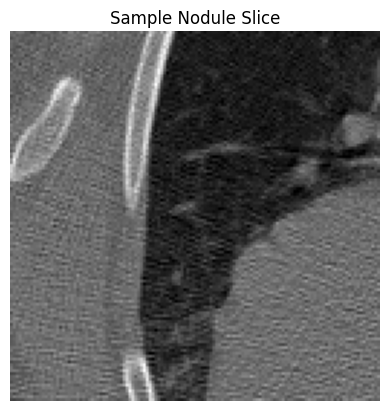

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Pick a sample image
sample_image_path = os.path.join(images_folder, 'slice-0.png')
img = mpimg.imread(sample_image_path)

plt.imshow(img, cmap='gray')
plt.title('Sample Nodule Slice')
plt.axis('off')
plt.show()

Files in mask-0 folder: ['slice-2.png', 'slice-1.png', 'slice-6.png', 'slice-4.png', 'slice-5.png', 'slice-3.png', 'slice-0.png', 'slice-7.png']


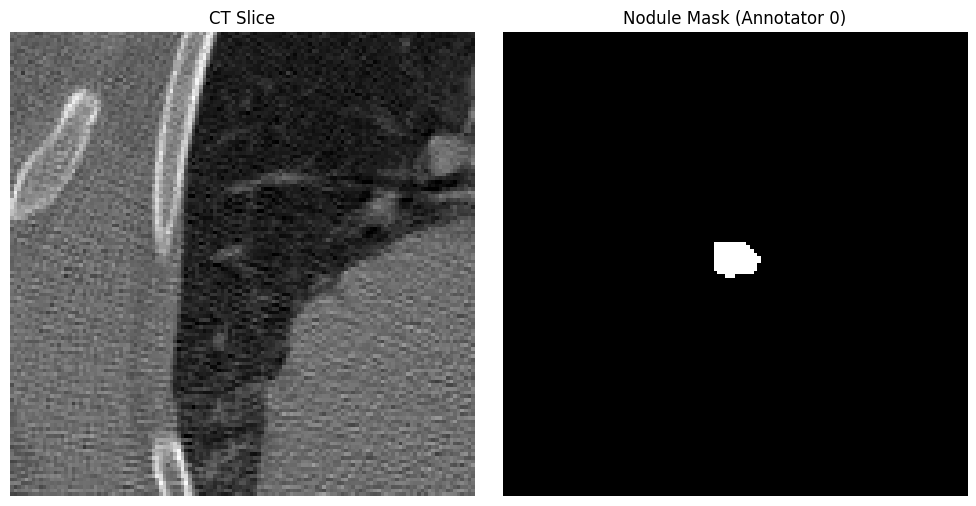

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# First, check what files are in one of the mask folders
mask_folder = os.path.join(nodule_folder, "mask-0")
if os.path.exists(mask_folder):
    mask_files = os.listdir(mask_folder)
    print(f"Files in mask-0 folder: {mask_files[:10]}")
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Load and display the CT slice
    slice_path = os.path.join(images_folder, 'slice-0.png')
    ct_img = mpimg.imread(slice_path)
    axes[0].imshow(ct_img, cmap='gray')
    axes[0].set_title('CT Slice')
    axes[0].axis('off')
    
    # Load and display the corresponding mask
    mask_path = os.path.join(mask_folder, mask_files[0])  # Assuming first file matches
    mask_img = mpimg.imread(mask_path)
    axes[1].imshow(mask_img, cmap='gray')
    axes[1].set_title('Nodule Mask (Annotator 0)')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No mask-0 folder found.")

Collected 15548 valid image-mask pairs
Split: train, Samples: 11098
Collected 15548 valid image-mask pairs
Split: val, Samples: 2231
Collected 15548 valid image-mask pairs
Split: test, Samples: 2219
Train dataset: {'num_samples': 11098, 'num_patients': 611, 'num_nodules': 1859}
Val dataset: {'num_samples': 2231, 'num_patients': 132, 'num_nodules': 387}
Test dataset: {'num_samples': 2219, 'num_patients': 132, 'num_nodules': 384}


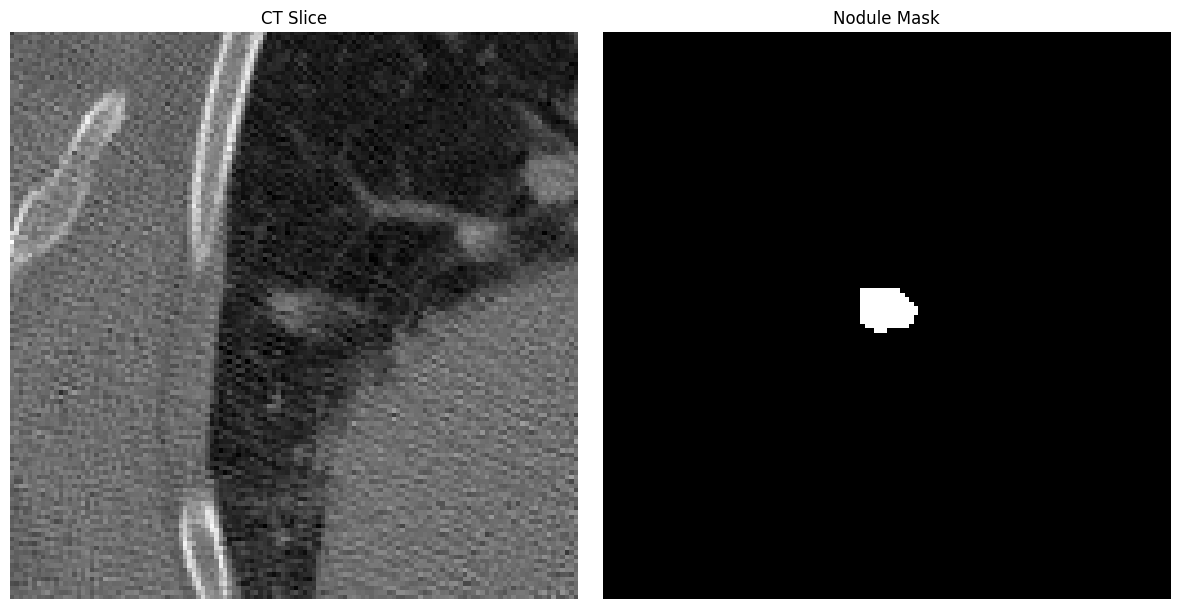

Sample metadata: {'patient_id': 'LIDC-IDRI-0262', 'nodule_id': 'nodule-0', 'slice_num': 2}


In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

class LIDCDataset:
    def __init__(self, base_path, task='detection', transform=None, split='train', 
                 val_ratio=0.15, test_ratio=0.15, seed=42):
        """
        LIDC-IDRI dataset loader
        
        Args:
            base_path: Path to the dataset root
            task: 'detection' or 'classification'
            transform: Optional transforms to apply
            split: 'train', 'val', or 'test'
            val_ratio: Percentage of data for validation
            test_ratio: Percentage of data for testing
            seed: Random seed for reproducibility
        """
        self.base_path = base_path
        self.task = task
        self.transform = transform
        self.split = split
        
        # Collect all patients and nodules
        self.samples = []
        self._collect_dataset()
        
        # Split into train/val/test
        self._create_splits(val_ratio, test_ratio, seed)
    
    def _collect_dataset(self):
        """Collect all image and mask pairs from the dataset"""
        slices_dir = os.path.join(self.base_path, "LIDC-IDRI-slices")
        
        # Loop through all patients
        for patient_id in os.listdir(slices_dir):
            patient_path = os.path.join(slices_dir, patient_id)
            if not os.path.isdir(patient_path):
                continue
                
            # Loop through nodules for this patient
            for nodule_id in os.listdir(patient_path):
                nodule_path = os.path.join(patient_path, nodule_id)
                if not os.path.isdir(nodule_path):
                    continue
                    
                # Get images and masks for this nodule
                images_path = os.path.join(nodule_path, "images")
                if not os.path.exists(images_path):
                    continue
                    
                # Check for all 4 annotator masks
                mask_paths = []
                for i in range(4):
                    mask_path = os.path.join(nodule_path, f"mask-{i}")
                    if os.path.exists(mask_path):
                        mask_paths.append(mask_path)
                
                # Skip if no masks available
                if not mask_paths:
                    continue
                
                # Collect all slices
                for img_file in os.listdir(images_path):
                    if not img_file.endswith('.png'):
                        continue
                    
                    # Extract slice number from filename (e.g., "slice-0.png" -> 0)
                    slice_num = int(img_file.split('-')[1].split('.')[0])
                    
                    # Find corresponding masks
                    masks = []
                    for mask_path in mask_paths:
                        mask_file = os.path.join(mask_path, img_file)
                        if os.path.exists(mask_file):
                            masks.append(mask_file)
                    
                    # Skip if no matching masks
                    if not masks:
                        continue
                    
                    # Add sample
                    self.samples.append({
                        'patient_id': patient_id,
                        'nodule_id': nodule_id,
                        'slice_num': slice_num,
                        'image_path': os.path.join(images_path, img_file),
                        'mask_paths': masks
                    })
        
        print(f"Collected {len(self.samples)} valid image-mask pairs")
    
    def _create_splits(self, val_ratio, test_ratio, seed):
        """Create train/val/test splits based on patient IDs to avoid data leakage"""
        # Get unique patient IDs
        patient_ids = list(set(s['patient_id'] for s in self.samples))
        
        # Split patient IDs
        train_ids, test_ids = train_test_split(
            patient_ids, test_size=test_ratio, random_state=seed
        )
        
        train_ids, val_ids = train_test_split(
            train_ids, test_size=val_ratio/(1-test_ratio), random_state=seed
        )
        
        # Filter samples based on split
        if self.split == 'train':
            self.samples = [s for s in self.samples if s['patient_id'] in train_ids]
        elif self.split == 'val':
            self.samples = [s for s in self.samples if s['patient_id'] in val_ids]
        elif self.split == 'test':
            self.samples = [s for s in self.samples if s['patient_id'] in test_ids]
        
        print(f"Split: {self.split}, Samples: {len(self.samples)}")
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        """Load and return a sample"""
        sample = self.samples[idx]
        
        # Load image
        image = np.array(Image.open(sample['image_path']))
        
        # Load masks (using first annotator by default)
        mask = np.array(Image.open(sample['mask_paths'][0]))
        
        # Load all masks if needed
        if self.task == 'classification':
            # For classification, we might want all annotator opinions
            all_masks = [np.array(Image.open(mask_path)) for mask_path in sample['mask_paths']]
            consensus_mask = np.zeros_like(all_masks[0])
            for m in all_masks:
                consensus_mask += m
            # Consider a pixel part of nodule if at least 2 annotators agree
            consensus_mask = (consensus_mask >= 2).astype(np.float32)
            mask = consensus_mask
        
        # Apply transformations if provided
        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']
            
        # Add channel dimension if needed and convert to tensor if not already
        if not torch.is_tensor(image):
            if len(image.shape) == 2:
                image = image[np.newaxis, ...]
            image = torch.from_numpy(image.astype(np.float32))
        
        if not torch.is_tensor(mask):
            if len(mask.shape) == 2:
                mask = mask[np.newaxis, ...]
            mask = torch.from_numpy(mask.astype(np.float32))
        
        # For classification task, we might want to return additional info
        metadata = {
            'patient_id': sample['patient_id'],
            'nodule_id': sample['nodule_id'],
            'slice_num': sample['slice_num']
        }
        
        return {
            'image': image, 
            'mask': mask,
            'metadata': metadata
        }
    
    def get_stats(self):
        """Return dataset statistics"""
        num_patients = len(set(s['patient_id'] for s in self.samples))
        num_nodules = len(set((s['patient_id'], s['nodule_id']) for s in self.samples))
        
        return {
            'num_samples': len(self.samples),
            'num_patients': num_patients,
            'num_nodules': num_nodules
        }

# Example usage
if __name__ == "__main__":
    # Replace with your dataset path
    base_path = path  # Using the path variable from earlier cells
    
    # Create dataset instances
    train_dataset = LIDCDataset(base_path, split='train')
    val_dataset = LIDCDataset(base_path, split='val')
    test_dataset = LIDCDataset(base_path, split='test')
    
    # Print statistics
    print("Train dataset:", train_dataset.get_stats())
    print("Val dataset:", val_dataset.get_stats())
    print("Test dataset:", test_dataset.get_stats())
    
    # Get a sample and visualize
    sample = train_dataset[0]
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(sample['image'].squeeze(), cmap='gray')
    plt.title('CT Slice')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(sample['mask'].squeeze(), cmap='gray')
    plt.title('Nodule Mask')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print sample metadata
    print("Sample metadata:", sample['metadata'])

/home/cpp/miniconda3/envs/torch/lib/python3.12/site-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Collected 15548 valid image-mask pairs
Split: train, Samples: 11098


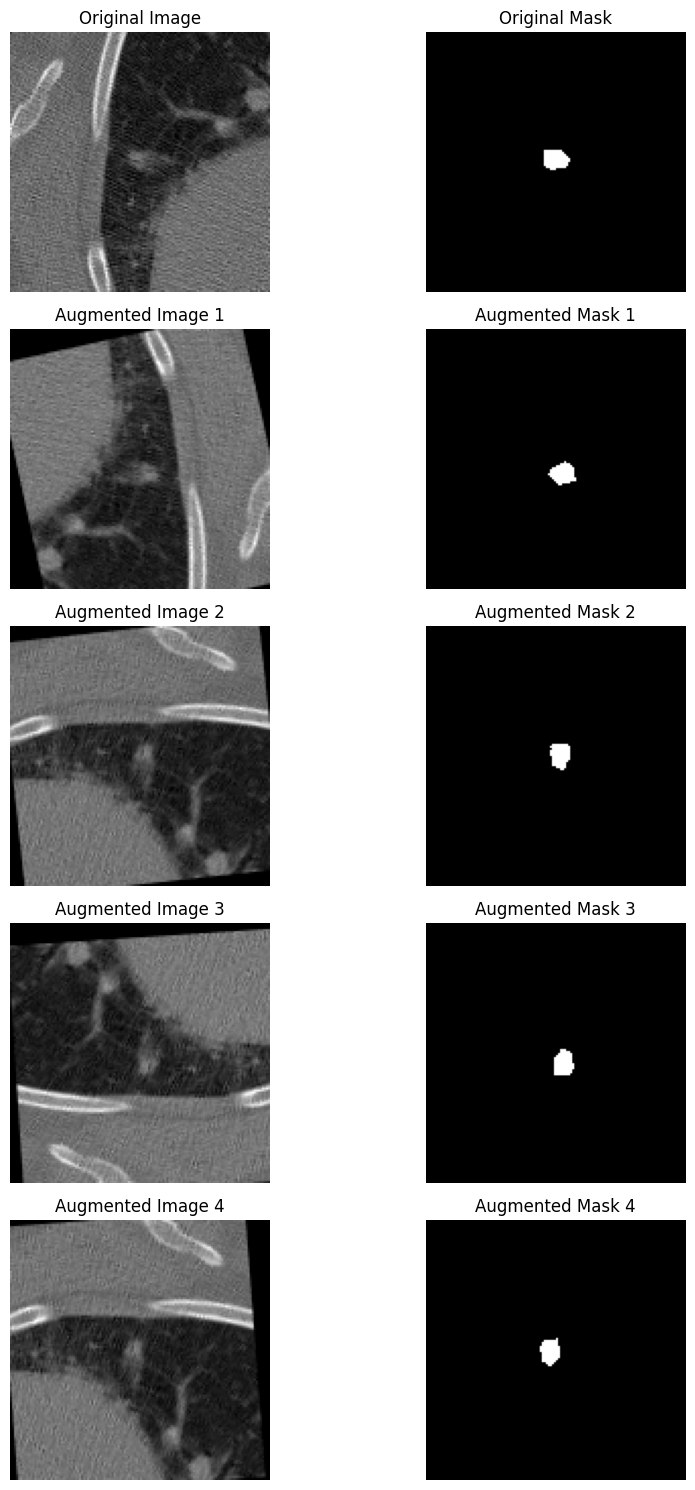

In [10]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

def get_training_transforms(p=0.5):
    return A.Compose([
        # Spatial transforms (maintain anatomical context)
        A.RandomRotate90(p=p),
        A.HorizontalFlip(p=p),
        A.VerticalFlip(p=p),
        A.ShiftScaleRotate(
            shift_limit=0.05,
            scale_limit=0.05,
            rotate_limit=15,
            p=p
        ),
        
        # Mild elastic deformation - reduced probability
        A.ElasticTransform(
            alpha=1.0,
            sigma=50,
            p=0.2,  # Reduced from 0.3
        ),
        
        # FIXED noise augmentation - use var parameter instead of var_limit
        A.GaussNoise(
            std_range=(0.01, 0.05),  # Adjusted for less noise
            mean_range=(0.0, 0.01),
            p=0.1
        ),
        
        # Very mild contrast/brightness
        A.RandomBrightnessContrast(
            brightness_limit=0.02,
            contrast_limit=0.02,
            p=0.1
        ),
        
        # Standard preprocessing
        A.Normalize(mean=0.5, std=0.5),
        ToTensorV2(),
    ])

# Fixed visualize_augmentations function to handle tensor dimensions properly
def visualize_augmentations(dataset, idx=0, num_samples=5):
    sample = dataset.samples[idx]
    image = np.array(Image.open(sample['image_path']))
    mask = np.array(Image.open(sample['mask_paths'][0]))
    
    # Create a figure with rows showing different augmentations
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, num_samples*3))
    
    for i in range(num_samples):
        # Apply a random augmentation
        if i == 0:
            # First row shows original
            aug_image, aug_mask = image, mask
            axes[i, 0].set_title("Original Image")
            axes[i, 1].set_title("Original Mask")
        else:
            # Apply augmentation
            transform = get_training_transforms(p=1.0)  # Force augmentation
            augmented = transform(image=image, mask=mask)
            
            # Convert from tensor to numpy and handle dimensions
            if torch.is_tensor(augmented['image']):
                aug_image = augmented['image'].numpy()
                # Handle channel dimension correctly (C,H,W) -> (H,W,C) or just squeeze
                if len(aug_image.shape) == 3:
                    aug_image = np.transpose(aug_image, (1, 2, 0))
            else:
                aug_image = augmented['image']
                
            if torch.is_tensor(augmented['mask']):
                aug_mask = augmented['mask'].numpy()
                if len(aug_mask.shape) == 3:
                    aug_mask = np.transpose(aug_mask, (1, 2, 0))
            else:
                aug_mask = augmented['mask']
                
            axes[i, 0].set_title(f"Augmented Image {i}")
            axes[i, 1].set_title(f"Augmented Mask {i}")
        
        # Display the augmented images
        axes[i, 0].imshow(aug_image.squeeze(), cmap='gray') 
        axes[i, 0].axis('off')
        axes[i, 1].imshow(aug_mask.squeeze(), cmap='gray')
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Define the LIDCDatasetWithAugmentation class
class LIDCDatasetWithAugmentation(LIDCDataset):
    def __init__(self, base_path, task='detection', split='train', 
                 val_ratio=0.15, test_ratio=0.15, seed=42):
        """
        LIDC-IDRI dataset with automatic augmentation
        
        This class extends LIDCDataset to automatically apply the appropriate
        transforms based on the split (training or validation/test)
        """
        # Set appropriate transforms based on split
        if split == 'train':
            transform = get_training_transforms(p=0.5)
        else:
            transform = get_validation_transforms()
        
        # Initialize parent class with the transform
        super().__init__(base_path, task, transform, split, val_ratio, test_ratio, seed)

# Define validation transforms (missing in original code)
def get_validation_transforms():
    """Only normalization and conversion to tensor, no augmentation"""
    return A.Compose([
        A.Normalize(mean=0.5, std=0.5),
        ToTensorV2(),
    ])
    
# Example usage
if __name__ == "__main__":
    # Create augmented dataset
    augmented_train_dataset = LIDCDatasetWithAugmentation(path, split='train')
    
    # Visualize some augmentations
    visualize_augmentations(augmented_train_dataset)

# Model Exploration

## Efficient Unet
from torch.nn import init

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, 
                             stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        return F.relu(self.bn(self.conv(x)), inplace=True)

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size,
                                  stride=stride, padding=padding, groups=in_channels, bias=False)
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.depthwise(x)), inplace=True)
        return F.relu(self.bn2(self.pointwise(x)), inplace=True)

class EfficientUNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        
        # Encoder
        self.enc1 = ConvBlock(in_channels, 32)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = DepthwiseSeparableConv(32, 64)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = DepthwiseSeparableConv(64, 128)
        self.pool3 = nn.MaxPool2d(2)
        self.enc4 = DepthwiseSeparableConv(128, 256)
        self.pool4 = nn.MaxPool2d(2)
        
        # Bottleneck
        self.bottleneck = DepthwiseSeparableConv(256, 512)
        
        # Decoder
        self.upconv4 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec4 = DepthwiseSeparableConv(512, 256)
        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec3 = DepthwiseSeparableConv(256, 128)
        self.upconv2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec2 = DepthwiseSeparableConv(128, 64)
        self.upconv1 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.dec1 = DepthwiseSeparableConv(64, 32)
        
        # Output layer
        self.outconv = nn.Conv2d(32, out_channels, kernel_size=1)
        
        # Initialize weights
        self._initialize_weights()
        
    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool1(enc1))
        enc3 = self.enc3(self.pool2(enc2))
        enc4 = self.enc4(self.pool3(enc3))
        
        # Bottleneck
        bottleneck = self.bottleneck(self.pool4(enc4))
        
        # Decoder with skip connections
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.dec4(dec4)
        
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.dec3(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.dec2(dec2)
        
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.dec1(dec1)
        
        # Output segmentation map
        return torch.sigmoid(self.outconv(dec1))
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
                init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)

## ResU-Net
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Residual connection
        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1),
                nn.BatchNorm2d(out_channels)
            )
        
    def forward(self, x):
        residual = x
        
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        
        out += self.shortcut(residual)
        out = F.relu(out)
        
        return out

class ResUNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        
        # Encoder
        self.enc1 = ResidualBlock(in_channels, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = ResidualBlock(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = ResidualBlock(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.enc4 = ResidualBlock(256, 512)
        self.pool4 = nn.MaxPool2d(2)
        
        # Bottleneck
        self.bottleneck = ResidualBlock(512, 1024)
        
        # Decoder
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = ResidualBlock(1024, 512)  # 512 + 512 input channels
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = ResidualBlock(512, 256)   # 256 + 256 input channels
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = ResidualBlock(256, 128)   # 128 + 128 input channels
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = ResidualBlock(128, 64)    # 64 + 64 input channels
        
        # Output layer
        self.outconv = nn.Conv2d(64, out_channels, kernel_size=1)
        
    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool1(enc1))
        enc3 = self.enc3(self.pool2(enc2))
        enc4 = self.enc4(self.pool3(enc3))
        
        # Bottleneck
        bottleneck = self.bottleneck(self.pool4(enc4))
        
        # Decoder with skip connections
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.dec4(dec4)
        
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.dec3(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.dec2(dec2)
        
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.dec1(dec1)
        
        # Output segmentation map
        return torch.sigmoid(self.outconv(dec1))

## Baseline U-Net
# Add to your notebook
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        
        # Encoder
        self.enc1 = DoubleConv(in_channels, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = DoubleConv(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = DoubleConv(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.enc4 = DoubleConv(256, 512)
        self.pool4 = nn.MaxPool2d(2)
        
        # Bottleneck
        self.bottleneck = DoubleConv(512, 1024)
        
        # Decoder
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = DoubleConv(1024, 512)  # 512 + 512 input channels from skip connection
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = DoubleConv(512, 256)   # 256 + 256 input channels
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = DoubleConv(256, 128)   # 128 + 128 input channels
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = DoubleConv(128, 64)    # 64 + 64 input channels
        
        # Output layer
        self.outconv = nn.Conv2d(64, out_channels, kernel_size=1)
        
    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool1(enc1))
        enc3 = self.enc3(self.pool2(enc2))
        enc4 = self.enc4(self.pool3(enc3))
        
        # Bottleneck
        bottleneck = self.bottleneck(self.pool4(enc4))
        
        # Decoder with skip connections
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.dec4(dec4)
        
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.dec3(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.dec2(dec2)
        
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.dec1(dec1)
        
        # Output segmentation map
        return torch.sigmoid(self.outconv(dec1))

# Trying Reduced first for speed

In [11]:
import torch.nn as nn
from torch.nn import init

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, 
                             stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        return F.relu(self.bn(self.conv(x)), inplace=True)

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size,
                                  stride=stride, padding=padding, groups=in_channels, bias=False)
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.depthwise(x)), inplace=True)
        return F.relu(self.bn2(self.pointwise(x)), inplace=True)

class EfficientUNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        
        # Encoder
        self.enc1 = ConvBlock(in_channels, 32)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = DepthwiseSeparableConv(32, 64)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = DepthwiseSeparableConv(64, 128)
        self.pool3 = nn.MaxPool2d(2)
        self.enc4 = DepthwiseSeparableConv(128, 256)
        self.pool4 = nn.MaxPool2d(2)
        
        # Bottleneck
        self.bottleneck = DepthwiseSeparableConv(256, 512)
        
        # Decoder
        self.upconv4 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec4 = DepthwiseSeparableConv(512, 256)
        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec3 = DepthwiseSeparableConv(256, 128)
        self.upconv2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec2 = DepthwiseSeparableConv(128, 64)
        self.upconv1 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.dec1 = DepthwiseSeparableConv(64, 32)
        
        # Output layer
        self.outconv = nn.Conv2d(32, out_channels, kernel_size=1)
        
        # Initialize weights
        self._initialize_weights()
        
    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool1(enc1))
        enc3 = self.enc3(self.pool2(enc2))
        enc4 = self.enc4(self.pool3(enc3))
        
        # Bottleneck
        bottleneck = self.bottleneck(self.pool4(enc4))
        
        # Decoder with skip connections
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.dec4(dec4)
        
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.dec3(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.dec2(dec2)
        
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.dec1(dec1)
        
        # Output segmentation map
        return torch.sigmoid(self.outconv(dec1))
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
                init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)

In [12]:
# Training function for your detection model
def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-4, device='cuda'):
    # Move model to device
    model = model.to(device)
    
    # Define loss function and optimizer
    criterion = nn.BCELoss()  # Binary Cross-Entropy for binary segmentation
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    # Optional: learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5, verbose=True
    )
    
    best_val_loss = float('inf')
    
    # Training loop
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        
        for batch in train_loader:
            images = batch['image'].to(device)
            masks = batch['mask'].to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            
            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            
        train_loss /= len(train_loader)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for batch in val_loader:
                images = batch['image'].to(device)
                masks = batch['mask'].to(device)
                
                outputs = model(images)
                loss = criterion(outputs, masks)
                
                val_loss += loss.item()
                
        val_loss /= len(val_loader)
        
        # Update scheduler
        scheduler.step(val_loss)
        
        # Print progress
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_nodule_detector.pth')
            print("Saved best model checkpoint.")
    
    return model

In [16]:
# Create data loaders for training and validation
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Set hyperparameters
BATCH_SIZE = 8
NUM_EPOCHS = 50
LEARNING_RATE = 3e-4
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {DEVICE}")

# Create dataset instances with appropriate augmentations
train_dataset = LIDCDatasetWithAugmentation(path, split='train')
val_dataset = LIDCDatasetWithAugmentation(path, split='val')

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

# Print dataset sizes
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

# Initialize model
model = EfficientUNet(in_channels=1, out_channels=1)
print(f"Model parameters: {sum(p.numel() for p in model.parameters())}")

# Define a combined BCE + Dice loss for better segmentation results
class DiceBCELoss(nn.Module):
    def __init__(self, weight=0.5):
        super(DiceBCELoss, self).__init__()
        self.weight = weight
        
    def forward(self, inputs, targets):
        # Ensure targets are float type
        targets = targets.float()
        
        # Ensure same shape between inputs and targets
        if len(targets.shape) == 3:
            targets = targets.unsqueeze(1)  # Add channel dimension
            
        # BCE Loss
        bce = F.binary_cross_entropy(inputs, targets, reduction='mean')
        
        # Dice Loss
        smooth = 1e-5
        inputs_flat = inputs.view(-1)
        targets_flat = targets.view(-1)
        
        intersection = (inputs_flat * targets_flat).sum()
        dice = (2. * intersection + smooth) / (inputs_flat.sum() + targets_flat.sum() + smooth)
        dice_loss = 1 - dice
        
        # Combine losses
        return bce * self.weight + dice_loss * (1 - self.weight)

# Train the model
criterion = DiceBCELoss(weight=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)

# Training loop
best_val_loss = float('inf')
history = {"train_loss": [], "val_loss": []}

for epoch in range(NUM_EPOCHS):
    # Training phase
    model.train()
    train_loss = 0.0
    
    for batch in train_loader:
        images = batch['image'].to(DEVICE)
        # Explicitly convert masks to float
        masks = batch['mask'].float().to(DEVICE)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    train_loss /= len(train_loader)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for batch in val_loader:
            images = batch['image'].to(DEVICE)
            # Also convert validation masks to float
            masks = batch['mask'].float().to(DEVICE)
            
            outputs = model(images)
            loss = criterion(outputs, masks)
            
            val_loss += loss.item()
            
    val_loss /= len(val_loader)
    
    # Update scheduler
    scheduler.step(val_loss)
    
    # Save history
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    
    # Print progress
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_nodule_detector.pth')
        print("Saved best model checkpoint.")

Using device: cpu
Collected 15548 valid image-mask pairs
Split: train, Samples: 11098
Collected 15548 valid image-mask pairs
Split: val, Samples: 2231
Training samples: 11098
Validation samples: 2231
Model parameters: 1064065


RuntimeError: all elements of target should be between 0 and 1